In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN,Dense
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('AABA_2006-01-01_to_2018-01-01.csv')
data.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA
1,2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA
2,2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA
3,2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA
4,2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3019 non-null   object 
 1   Open    3019 non-null   float64
 2   High    3019 non-null   float64
 3   Low     3019 non-null   float64
 4   Close   3019 non-null   float64
 5   Volume  3019 non-null   int64  
 6   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 165.2+ KB


In [6]:
data=data[['Open']]
data.head()

,Open
0,39.69
1,41.22
2,40.93
3,42.88
4,43.10


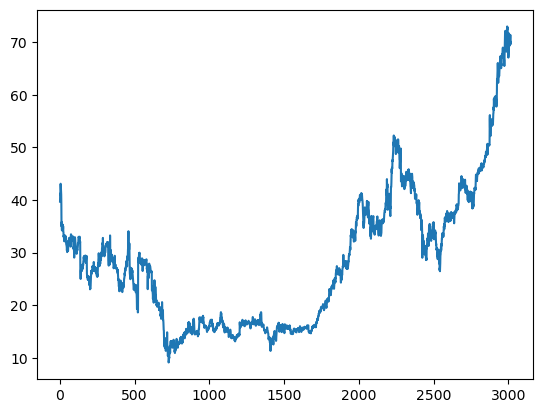

In [7]:
plt.plot(data)

In [9]:
X=data['Open'].values

In [10]:
X_train,X_test=X[:2500],X[2500:]

In [12]:
model=Sequential()
model.add(SimpleRNN(units=64,activation='tanh'))
model.add(Dense(1))

In [13]:
model.compile(loss='mse',optimizer='adam')

In [17]:
XT,YT=[],[]
for i in range(len(X_train)-90):
    d=i+90
    XT.append(X_train[i:d,])
    YT.append(X_train[d])

In [18]:
Xt,Yt=[],[]
for i in range(len(X_test)-90):
    d=i+90
    Xt.append(X_test[i:d,])
    Yt.append(X_test[d])

In [19]:
XT=np.array(XT)
Xt=np.array(Xt)

In [20]:
XT.shape

(2410, 90)

In [21]:
XT=np.reshape(XT,(XT.shape[0],XT.shape[1],1))
Xt=np.reshape(Xt,(Xt.shape[0],Xt.shape[1],1))

In [22]:
XT.shape

(2410, 90, 1)

In [23]:
YT=np.array(YT)
Yt=np.array(Yt)

In [24]:
history=model.fit(XT,YT,epochs=100,batch_size=20)

Epoch 1/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 372.7136
Epoch 2/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 172.0098
Epoch 3/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 102.1571
Epoch 4/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 60.8574
Epoch 5/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 38.7067
Epoch 6/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 26.1927
Epoch 7/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 18.3758
Epoch 8/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 13.3379
Epoch 9/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 9.9276
Epoch 10/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 7.6508
Epoch 11/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 5.9890
Epoch 12/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 4.7597
Epoch 13/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 3.8349
Epoch 14/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 3.1610
Epoch 15/100
121/1

In [25]:
model.evaluate(Xt,Yt)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 62.2802


62.28019714355469

In [26]:
XTpred=model.predict(XT)
Xtpred=model.predict(Xt)
Xpfinal=np.concatenate((XTpred,Xtpred),axis=0)

76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


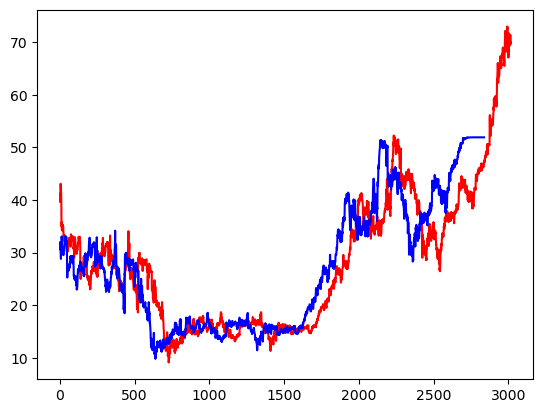

In [27]:
plt.plot(X,color='red')
plt.plot(Xpfinal,color='blue')